In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers.convolutional import Conv1D
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.layers import TimeDistributed
from keras.models import Model
from keras import regularizers
from keras.layers  import  LSTM
from keras.optimizers import Adam
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector
from keras.models import Model
import tensorflow as tf



from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
# Multiple Inputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
#from tensorflow.keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import load_model
import math, sys, time
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GRU, TimeDistributed, LSTM
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

from pandas._testing import assert_frame_equal
from pandas.testing import assert_index_equal
assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"

2023-02-12 14:26:51.702639: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from EEGP import EEGPreprocessor
import pandas as pd
import numpy as np
from sklearn.utils import resample
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pywt

In [3]:
path = "/Users/charleshajjar/Documents/DataAnalyse/srcs_dir/processed/"

In [4]:
import os
import pandas as pd

def concat_csv_files(folder_path):
    """
    Cette fonction parcourt un dossier, récupère tous les fichiers CSV,
    vérifie le nombre de colonnes et qu'il n'y a pas de ligne vide,
    puis les regroupe en un seul dataframe.
    """
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    dataframes = []
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        if df.columns.size == len(df.columns.unique()):
            if df.dropna().empty:
                print(f"Le fichier {file} a des lignes vides")
                continue
            dataframes.append(df)
        else:
            print(f"Le fichier {file} a des colonnes en double")
            continue
    return pd.concat(dataframes, axis=0, ignore_index=True)

In [5]:
df = concat_csv_files(path)

In [6]:
df

,Relative Energy,Target,Direction,p_value_fdr,Accelerometer X,Accelerometer Y,Accelerometer Z,Gyroscope X,Gyroscope Y,Gyroscope Z,Mean Spectral Accel X,Mean Spectral Accel Y,Mean Spectral Accel Z,Mean Spectral Gyro X,Mean Spectral Gyro Y
0,35.367064,Penser,Right,1.000000,0.025356,0.981690,-0.143450,-1.081194,-2.450127,3.117151,0.557389,0.797654,5.515205,2.113805,4.460929
1,14.568264,Non penser,Left,1.000000,0.087728,0.976075,-0.169434,-0.956218,2.126057,0.956216,0.582181,0.809969,3.256564,1.057465,2.789418
2,28.040786,Penser,Right,0.952618,0.025654,0.981709,-0.142724,-1.110840,-1.467286,2.667237,0.798439,0.898320,8.403838,3.170158,6.822606
3,22.035578,Non penser,Up,0.952618,0.085205,0.969238,-0.169922,0.305176,2.075200,1.190190,0.346481,0.757449,1.192318,0.417153,0.806835
4,48.030613,Penser,Right,0.952618,0.027344,0.982178,-0.143066,-0.976562,-3.936770,3.784180,0.364979,0.745392,4.821071,1.858669,3.887651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20960,18.205961,Penser,Up,0.005689,0.096699,0.967503,-0.190192,-0.831299,2.147623,1.263833,0.815125,1.462883,4.908966,1.581036,4.359521
20961,18.838614,Non penser,None,0.005689,0.123779,0.963867,-0.204590,-1.281740,2.563480,1.190190,0.413337,0.389326,2.542461,0.841416,2.173687
20962,9.261387,Penser,Up,0.005689,0.078125,0.970947,-0.172119,-1.129150,1.861570,0.762939,0.380612,0.415462,2.043300,0.666152,1.724232
20963,19.208857,Non penser,None,0.005689,0.123702,0.963687,-0.204521,-1.241050,2.560267,1.204110,0.853838,1.119363,6.018298,1.968503,5.315283


In [7]:
df.Target.value_counts()

Penser        10484
Non penser    10481
Name: Target, dtype: int64

In [8]:
df.dtypes

Relative Energy          float64
Target                    object
Direction                 object
p_value_fdr              float64
Accelerometer X          float64
Accelerometer Y          float64
Accelerometer Z          float64
Gyroscope X              float64
Gyroscope Y              float64
Gyroscope Z              float64
Mean Spectral Accel X    float64
Mean Spectral Accel Y    float64
Mean Spectral Accel Z    float64
Mean Spectral Gyro X     float64
Mean Spectral Gyro Y     float64
dtype: object

In [210]:
def create_label_column(df):
    df['Label'] = ''
    mask = (df['Target'] == 'Penser')
    df.loc[mask, 'Label'] = df.loc[mask, 'Direction']
    df.loc[~mask, 'Label'] = "Non"
    return df

In [9]:
def create_label_column(df):
    df['Label'] = ''
    mask = (df['Target'] == 'Penser') & (df['Relative Energy'] > 18)
    df.loc[mask, 'Label'] = df.loc[mask, 'Direction']
    df.loc[~mask, 'Label'] = "Non"
    return df

In [10]:
df2 = create_label_column(df)

In [11]:
df2

,Relative Energy,Target,Direction,p_value_fdr,Accelerometer X,Accelerometer Y,Accelerometer Z,Gyroscope X,Gyroscope Y,Gyroscope Z,Mean Spectral Accel X,Mean Spectral Accel Y,Mean Spectral Accel Z,Mean Spectral Gyro X,Mean Spectral Gyro Y,Label
0,35.367064,Penser,Right,1.000000,0.025356,0.981690,-0.143450,-1.081194,-2.450127,3.117151,0.557389,0.797654,5.515205,2.113805,4.460929,Right
1,14.568264,Non penser,Left,1.000000,0.087728,0.976075,-0.169434,-0.956218,2.126057,0.956216,0.582181,0.809969,3.256564,1.057465,2.789418,Non
2,28.040786,Penser,Right,0.952618,0.025654,0.981709,-0.142724,-1.110840,-1.467286,2.667237,0.798439,0.898320,8.403838,3.170158,6.822606,Right
3,22.035578,Non penser,Up,0.952618,0.085205,0.969238,-0.169922,0.305176,2.075200,1.190190,0.346481,0.757449,1.192318,0.417153,0.806835,Non
4,48.030613,Penser,Right,0.952618,0.027344,0.982178,-0.143066,-0.976562,-3.936770,3.784180,0.364979,0.745392,4.821071,1.858669,3.887651,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20960,18.205961,Penser,Up,0.005689,0.096699,0.967503,-0.190192,-0.831299,2.147623,1.263833,0.815125,1.462883,4.908966,1.581036,4.359521,Up
20961,18.838614,Non penser,None,0.005689,0.123779,0.963867,-0.204590,-1.281740,2.563480,1.190190,0.413337,0.389326,2.542461,0.841416,2.173687,Non
20962,9.261387,Penser,Up,0.005689,0.078125,0.970947,-0.172119,-1.129150,1.861570,0.762939,0.380612,0.415462,2.043300,0.666152,1.724232,Non
20963,19.208857,Non penser,None,0.005689,0.123702,0.963687,-0.204521,-1.241050,2.560267,1.204110,0.853838,1.119363,6.018298,1.968503,5.315283,Non


In [12]:
df2.Label.value_counts()

Non      17992
None       783
Down       725
Right      589
Left       545
Up         331
Name: Label, dtype: int64

In [79]:
df2.Label.value_counts()

2    17992
3      783
0      725
4      589
1      545
5      331
Name: Label, dtype: int64

In [13]:
le = LabelEncoder()
le.fit(df2["Target"])
df2["Target"] = le.transform(df2["Target"])

In [14]:
le = LabelEncoder()
le.fit(df2["Label"])
df2["Label"] = le.transform(df2["Label"])

In [15]:
df

,Relative Energy,Target,Direction,p_value_fdr,Accelerometer X,Accelerometer Y,Accelerometer Z,Gyroscope X,Gyroscope Y,Gyroscope Z,Mean Spectral Accel X,Mean Spectral Accel Y,Mean Spectral Accel Z,Mean Spectral Gyro X,Mean Spectral Gyro Y,Label
0,35.367064,1,Right,1.000000,0.025356,0.981690,-0.143450,-1.081194,-2.450127,3.117151,0.557389,0.797654,5.515205,2.113805,4.460929,4
1,14.568264,0,Left,1.000000,0.087728,0.976075,-0.169434,-0.956218,2.126057,0.956216,0.582181,0.809969,3.256564,1.057465,2.789418,2
2,28.040786,1,Right,0.952618,0.025654,0.981709,-0.142724,-1.110840,-1.467286,2.667237,0.798439,0.898320,8.403838,3.170158,6.822606,4
3,22.035578,0,Up,0.952618,0.085205,0.969238,-0.169922,0.305176,2.075200,1.190190,0.346481,0.757449,1.192318,0.417153,0.806835,2
4,48.030613,1,Right,0.952618,0.027344,0.982178,-0.143066,-0.976562,-3.936770,3.784180,0.364979,0.745392,4.821071,1.858669,3.887651,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20960,18.205961,1,Up,0.005689,0.096699,0.967503,-0.190192,-0.831299,2.147623,1.263833,0.815125,1.462883,4.908966,1.581036,4.359521,5
20961,18.838614,0,None,0.005689,0.123779,0.963867,-0.204590,-1.281740,2.563480,1.190190,0.413337,0.389326,2.542461,0.841416,2.173687,2
20962,9.261387,1,Up,0.005689,0.078125,0.970947,-0.172119,-1.129150,1.861570,0.762939,0.380612,0.415462,2.043300,0.666152,1.724232,2
20963,19.208857,0,None,0.005689,0.123702,0.963687,-0.204521,-1.241050,2.560267,1.204110,0.853838,1.119363,6.018298,1.968503,5.315283,2


In [16]:
import seaborn as sns

def plot_scatter(df):
    sns.scatterplot(x=df.index, y="Accelerometer Z", hue="Label", data=df)
    plt.show()

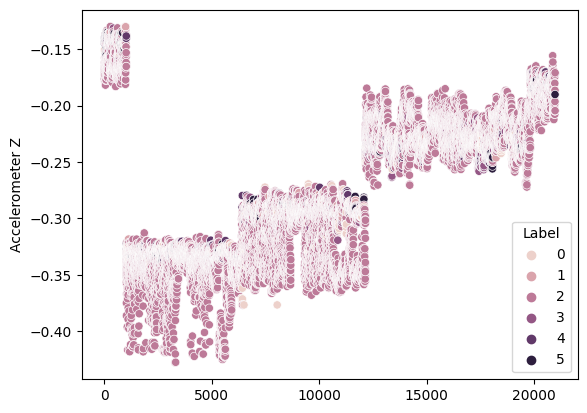

In [17]:
plot_scatter(df)

/var/folders/3l/4xwf62fd4zs9w79rml6s6b800000gn/T/ipykernel_830/3736092020.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)


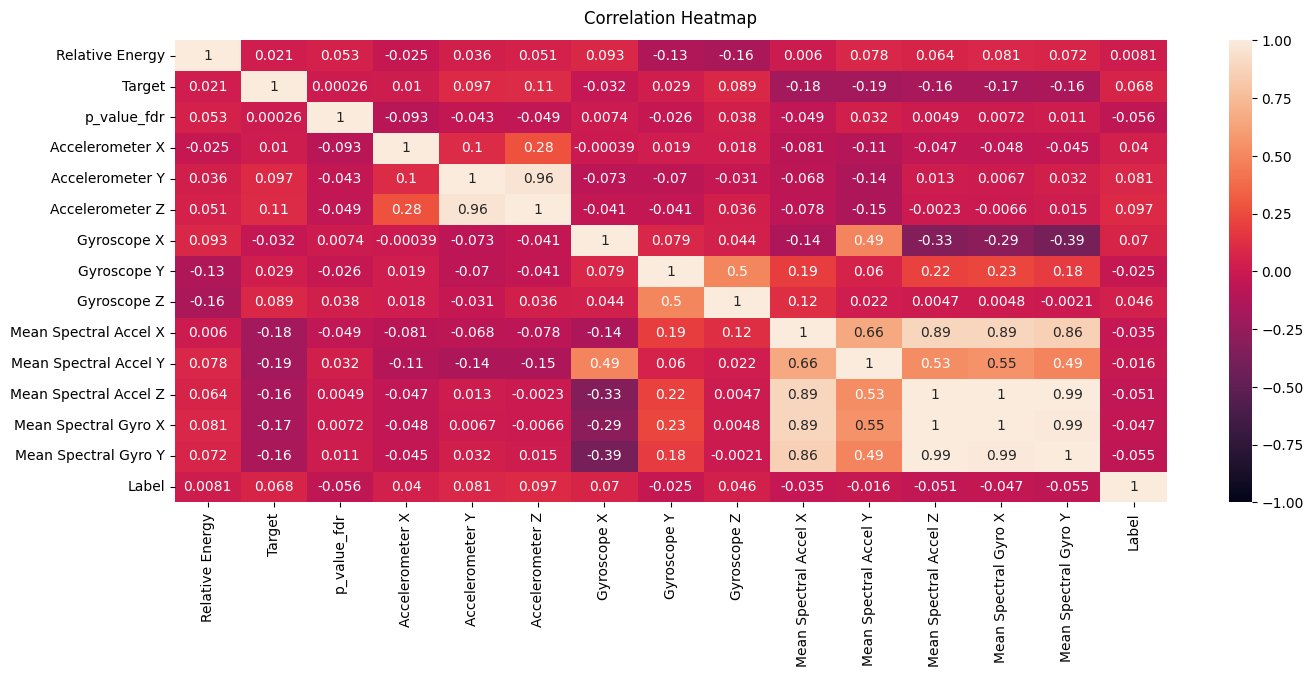

In [18]:
import seaborn as sns
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [44]:
# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
# define dataset
X = df2[['Relative Energy', 'Target', 'p_value_fdr',
       'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
       'Gyroscope Y', 'Gyroscope Z', 'Mean Spectral Accel X',
       'Mean Spectral Accel Y', 'Mean Spectral Accel Z',
       'Mean Spectral Gyro X', 'Mean Spectral Gyro Y']].values
y = df2["Label"].values
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
scaler = StandardScaler()
X_ = scaler.fit_transform(X,y)

Counter({2: 17992, 3: 783, 0: 725, 4: 589, 1: 545, 5: 331})
Counter({5: 18051, 2: 17992, 3: 17989, 1: 17975, 4: 17905, 0: 17868})


In [45]:
# Séparation en données d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X_, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_val)

In [22]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.9905362776025236


In [63]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3608
           1       0.99      0.99      0.99      3641
           2       1.00      1.00      1.00      3626
           3       0.99      0.98      0.99      3590
           4       0.99      0.99      0.99      3595
           5       0.99      1.00      0.99      3496

    accuracy                           0.99     21556
   macro avg       0.99      0.99      0.99     21556
weighted avg       0.99      0.99      0.99     21556



<AxesSubplot: >

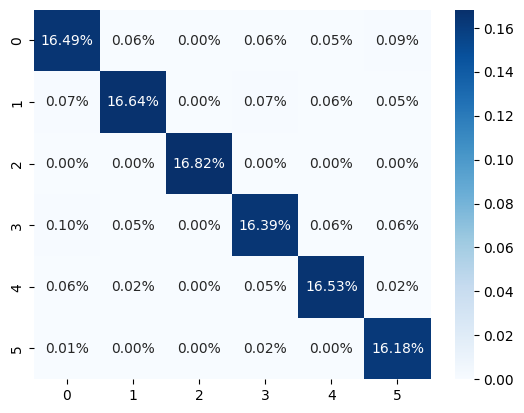

In [70]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

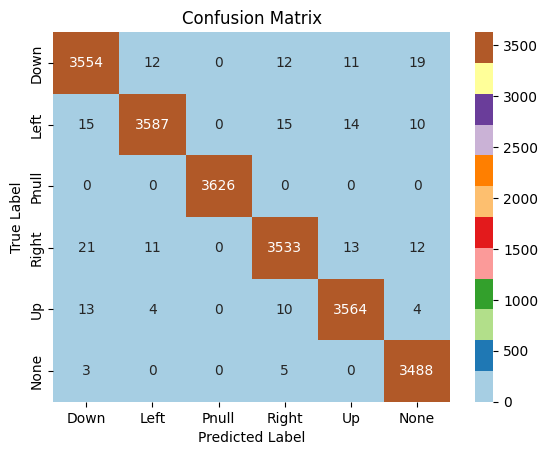

In [87]:
def make_confusion_matrix(cf_matrix, group_names, categories, cmap):
    cf_matrix = np.array(cf_matrix, dtype=np.int32)
    sns.heatmap(cf_matrix, annot=True, fmt="d", cmap=cmap, xticklabels=categories, yticklabels=categories)
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Down', 'Left', 'Pnull','Right','Up', 'None']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap=plt.cm.Paired,)

In [23]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(max_features='auto', n_jobs=1)

In [25]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=['Relative Energy', 'Target', 'p_value_fdr',
       'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
       'Gyroscope Y', 'Gyroscope Z', 'Mean Spectral Accel X',
       'Mean Spectral Accel Y', 'Mean Spectral Accel Z',
       'Mean Spectral Gyro X', 'Mean Spectral Gyro Y']).sort_values(ascending=False)
feature_imp

Relative Energy          0.200840
Gyroscope Z              0.086663
Accelerometer X          0.079232
Gyroscope Y              0.078661
Accelerometer Z          0.073344
Gyroscope X              0.068334
p_value_fdr              0.064237
Accelerometer Y          0.057483
Target                   0.052820
Mean Spectral Accel Y    0.050098
Mean Spectral Gyro Y     0.048938
Mean Spectral Gyro X     0.047672
Mean Spectral Accel Z    0.047053
Mean Spectral Accel X    0.044623
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


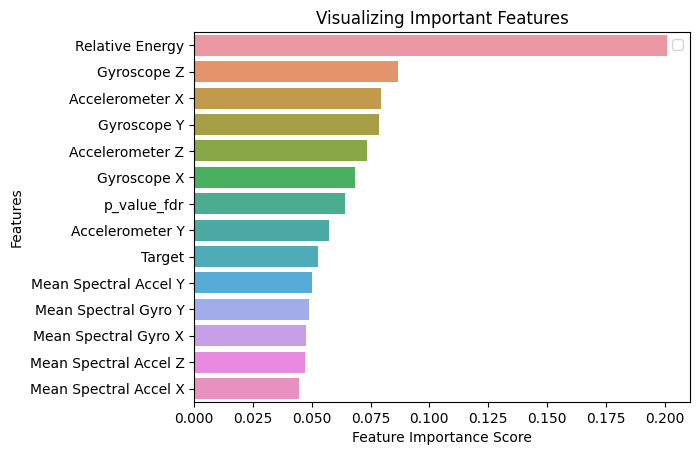

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Split the data into training and validation sets
X = np.concatenate((X_train, X_val))
y = np.concatenate((y_train, y_val))

# Use StratifiedKFold to shuffle and split the data
skf = StratifiedKFold(n_splits=2, shuffle=True)
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred=clf.predict(X_val)

In [28]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [29]:
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.989 (0.001)


In [46]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Boucle sur chaque classe
for i in np.unique(y_val):
    # Sélectionnez les observations pour une classe spécifique
    y_class = (y_val == i).astype(int)
    
    # Calculez les précisions, les rappels et les seuils pour la classe
    precisions, recalls, thresholds = precision_recall_curve(y_class, y_pred)
    
    # Affichez les précisions, les rappels et les seuils pour la classe
    print("Class", i)
    print("Precisions:", precisions)
    print("Recalls:", recalls)
    print("Thresholds:", thresholds)

Class 0
Precisions: [0.16737799 0.00300836 0.00292969 0.00392157 0.00420463 0.00537787
 1.        ]
Recalls: [1.         0.01496674 0.0116408  0.0116408  0.00831486 0.00526608
 0.        ]
Thresholds: [0 1 2 3 4 5]
Class 1
Precisions: [0.16890889 0.20200557 0.00272042 0.00364146 0.0033637  0.00283046
 1.        ]
Recalls: [1.         0.99588025 0.01071134 0.01071134 0.0065916  0.0027465
 0.        ]
Thresholds: [0 1 2 3 4 5]
Class 2
Precisions: [0.16821303 0.20200557 0.25292969 0.         0.         0.
 1.        ]
Recalls: [1. 1. 1. 0. 0. 0. 0.]
Thresholds: [0 1 2 3 4 5]
Class 3
Precisions: [0.16654296 0.19883008 0.24818638 0.33221289 0.00350385 0.00339655
 1.        ]
Recalls: [1.         0.99415042 0.99108635 0.99108635 0.00696379 0.00334262
 0.        ]
Thresholds: [0 1 2 3 4 5]
Class 4
Precisions: [0.16677491 0.19955432 0.24958147 0.3340803  0.50007008 0.00113218
 1.        ]
Recalls: [1.         0.99638387 0.99527121 0.99527121 0.99248957 0.00111266
 0.        ]
Thresholds: [0 1 

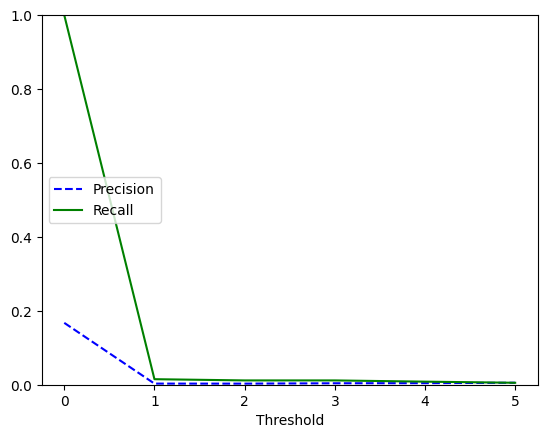

In [82]:
import matplotlib.pyplot as plt

precisions = [0.16737799, 0.00300836, 0.00292969, 0.00392157, 0.00420463, 0.00537787, 1.0]
recalls = [1.0, 0.01496674, 0.0116408, 0.0116408, 0.00831486, 0.00526608, 0.0]
thresholds = [0, 1, 2, 3, 4, 5]

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.ylim([0, 1])
plt.show()

In [88]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [ ]:
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [89]:
input_shape = (86224, 14)
n_classes = 6

In [90]:
class GatedActivationUnit(keras.layers.Layer):
    def __init__(self, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
    def call(self, inputs):
        n_filters = inputs.shape[-1] // 2
        linear_output = self.activation(inputs[..., :n_filters])
        gate = keras.activations.sigmoid(inputs[..., n_filters:])
        return self.activation(linear_output) * gate

def wavenet_residual_block(inputs, n_filters, dilation_rate):
    z = keras.layers.Conv1D(2 * n_filters, kernel_size=2, padding="causal",
                            dilation_rate=dilation_rate)(inputs)
    z = GatedActivationUnit()(z)
    z = keras.layers.Bidirectional(LSTM(n_filters, activation='relu', return_sequences=True))(z)
    z = GatedActivationUnit()(z)
    z = keras.layers.Bidirectional(GRU(n_filters, activation='relu', return_sequences=True))(z)
    z = keras.layers.Conv1D(n_filters, kernel_size=1)(z)
    return keras.layers.Add()([z, inputs]), z

def create_model(input_shape, n_classes):
    n_layers_per_block = 10 # 10 in the paper
    n_blocks = 3 # 3 in the paper
    n_filters = 40# 128 in the paper
    inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
    z= keras.layers.Conv1D(filters=40, kernel_size=1, strides=1, padding="valid")(inputs)
    skip_to_last = []
    for dilation_rate in [2**i for i in range(n_layers_per_block)] * n_blocks:
        z, skip = wavenet_residual_block(z, n_filters, dilation_rate)
        skip_to_last.append(skip)
    z = keras.activations.relu(keras.layers.Add()(skip_to_last))
    z = keras.layers.Conv1D(n_filters, kernel_size=1, activation="relu")(z)
    z = keras.layers.GlobalAveragePooling1D()(z)
    outputs = keras.layers.Dense(n_classes, activation="softmax")(z)
    model = keras.models.Model(inputs=[inputs], outputs=[outputs])
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [91]:
model = create_model(input_shape,6)

In [92]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 14, 1)]      0           []                               
                                                                                                  
 conv1d_62 (Conv1D)             (None, 14, 40)       80          ['input_2[0][0]']                
                                                                                                  
 conv1d_63 (Conv1D)             (None, 14, 80)       6480        ['conv1d_62[0][0]']              
                                                                                                  
 gated_activation_unit_60 (Gate  (None, 14, 40)      0           ['conv1d_63[0][0]']              
 dActivationUnit)                                                                           

 conv1d_71 (Conv1D)             (None, 14, 80)       6480        ['add_34[0][0]']                 
                                                                                                  
 gated_activation_unit_68 (Gate  (None, 14, 40)      0           ['conv1d_71[0][0]']              
 dActivationUnit)                                                                                 
                                                                                                  
 bidirectional_68 (Bidirectiona  (None, 14, 80)      25920       ['gated_activation_unit_68[0][0]'
 l)                                                              ]                                
                                                                                                  
 gated_activation_unit_69 (Gate  (None, 14, 40)      0           ['bidirectional_68[0][0]']       
 dActivationUnit)                                                                                 
          

                                                                                                  
 gated_activation_unit_77 (Gate  (None, 14, 40)      0           ['bidirectional_76[0][0]']       
 dActivationUnit)                                                                                 
                                                                                                  
 bidirectional_77 (Bidirectiona  (None, 14, 80)      19680       ['gated_activation_unit_77[0][0]'
 l)                                                              ]                                
                                                                                                  
 conv1d_80 (Conv1D)             (None, 14, 40)       3240        ['bidirectional_77[0][0]']       
                                                                                                  
 add_39 (Add)                   (None, 14, 40)       0           ['conv1d_80[0][0]',              
          

 conv1d_88 (Conv1D)             (None, 14, 40)       3240        ['bidirectional_85[0][0]']       
                                                                                                  
 add_43 (Add)                   (None, 14, 40)       0           ['conv1d_88[0][0]',              
                                                                  'add_42[0][0]']                 
                                                                                                  
 conv1d_89 (Conv1D)             (None, 14, 80)       6480        ['add_43[0][0]']                 
                                                                                                  
 gated_activation_unit_86 (Gate  (None, 14, 40)      0           ['conv1d_89[0][0]']              
 dActivationUnit)                                                                                 
                                                                                                  
 bidirecti

 gated_activation_unit_94 (Gate  (None, 14, 40)      0           ['conv1d_97[0][0]']              
 dActivationUnit)                                                                                 
                                                                                                  
 bidirectional_94 (Bidirectiona  (None, 14, 80)      25920       ['gated_activation_unit_94[0][0]'
 l)                                                              ]                                
                                                                                                  
 gated_activation_unit_95 (Gate  (None, 14, 40)      0           ['bidirectional_94[0][0]']       
 dActivationUnit)                                                                                 
                                                                                                  
 bidirectional_95 (Bidirectiona  (None, 14, 80)      19680       ['gated_activation_unit_95[0][0]'
 l)       

 edActivationUnit)                                                                                
                                                                                                  
 bidirectional_103 (Bidirection  (None, 14, 80)      19680       ['gated_activation_unit_103[0][0]
 al)                                                             ']                               
                                                                                                  
 conv1d_106 (Conv1D)            (None, 14, 40)       3240        ['bidirectional_103[0][0]']      
                                                                                                  
 add_52 (Add)                   (None, 14, 40)       0           ['conv1d_106[0][0]',             
                                                                  'add_51[0][0]']                 
                                                                                                  
 conv1d_10

 add_56 (Add)                   (None, 14, 40)       0           ['conv1d_114[0][0]',             
                                                                  'add_55[0][0]']                 
                                                                                                  
 conv1d_115 (Conv1D)            (None, 14, 80)       6480        ['add_56[0][0]']                 
                                                                                                  
 gated_activation_unit_112 (Gat  (None, 14, 40)      0           ['conv1d_115[0][0]']             
 edActivationUnit)                                                                                
                                                                                                  
 bidirectional_112 (Bidirection  (None, 14, 80)      25920       ['gated_activation_unit_112[0][0]
 al)                                                             ']                               
          

                                                                  'conv1d_78[0][0]',              
                                                                  'conv1d_80[0][0]',              
                                                                  'conv1d_82[0][0]',              
                                                                  'conv1d_84[0][0]',              
                                                                  'conv1d_86[0][0]',              
                                                                  'conv1d_88[0][0]',              
                                                                  'conv1d_90[0][0]',              
                                                                  'conv1d_92[0][0]',              
                                                                  'conv1d_94[0][0]',              
                                                                  'conv1d_96[0][0]',              
          

In [93]:
model.fit(X_train, y_train, epochs=30, batch_size=62, validation_data=(X_val, y_val), shuffle = True)

Epoch 1/30
1391/1391 [==============================] - 1344s 862ms/step - loss: 1.2900 - accuracy: 0.4246 - val_loss: 1.1532 - val_accuracy: 0.4892
Epoch 2/30
1391/1391 [==============================] - 1199s 862ms/step - loss: 1.1000 - accuracy: 0.5294 - val_loss: 1.0617 - val_accuracy: 0.5549
Epoch 3/30
1391/1391 [==============================] - 1183s 851ms/step - loss: 0.9853 - accuracy: 0.5933 - val_loss: 0.9261 - val_accuracy: 0.6179
Epoch 4/30
1391/1391 [==============================] - 1206s 867ms/step - loss: 0.8445 - accuracy: 0.6583 - val_loss: 0.8067 - val_accuracy: 0.6804
Epoch 5/30
1391/1391 [==============================] - 1234s 887ms/step - loss: 0.7361 - accuracy: 0.7059 - val_loss: 0.7089 - val_accuracy: 0.7246
Epoch 6/30
1391/1391 [==============================] - 1268s 911ms/step - loss: 0.6393 - accuracy: 0.7481 - val_loss: 0.6050 - val_accuracy: 0.7652
Epoch 7/30
1391/1391 [==============================] - 1274s 916ms/step - loss: 0.5551 - accuracy: 0.7844

In [94]:
model.save('/Users/charleshajjar/Documents/DataAnalyse/srcs_dir/processed/Al_Hajj')

INFO:tensorflow:Assets written to: /Users/charleshajjar/Documents/DataAnalyse/srcs_dir/processed/Al_Hajj/assets


INFO:tensorflow:Assets written to: /Users/charleshajjar/Documents/DataAnalyse/srcs_dir/processed/Al_Hajj/assets


In [98]:
val_predictions = model.predict(X_val)

674/674 [==============================] - 101s 125ms/step


In [99]:
val_classes = val_predictions.argmax(axis=1)

In [100]:
val_classes

array([5, 2, 2, ..., 2, 1, 1])

In [105]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Créer la matrice de confusion
cm = confusion_matrix(y_val, val_classes)
print('Matrice de confusion :')
print(cm)

# Calculer les métriques de performance
acc = accuracy_score(y_val, val_classes)
prec = precision_score(y_val, val_classes,average='micro')
rec = recall_score(y_val, val_classes,average='micro')
f1 = f1_score(y_val, val_classes,average='micro')

print('Accuracy :', acc)
print('Precision :', prec)
print('Recall :', rec)
print('F1 Score :', f1)

Matrice de confusion :
[[3275   73    0  148   68   44]
 [  79 3449    0   70   33   10]
 [   9    1 3596   12    3    5]
 [  79   64    0 3363   60   24]
 [  86   44    0  108 3314   43]
 [  46   28    0   53   30 3339]]
Accuracy : 0.9434032287994062
Precision : 0.9434032287994062
Recall : 0.9434032287994062
F1 Score : 0.9434032287994062
